# Trabajo Práctico Final de Pandas

## Autores:

- Alfredo Sanz
- Juan Manuel Saad


In [204]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## **Paso 1**: Leer los archivos y crear los dataframes

En este paso, se leerán los archivos CSV ubicados en la carpeta `datos` y se crearán dataframes de pandas a partir de ellos. Esto permitirá manipular y analizar los datos de las llamadas a la Línea 144 correspondientes a los años 2020, 2021, 2022 y el primer semestre de 2023.


In [205]:
csv_files = [
    "./datos/linea144-2020.csv",
    "./datos/linea144-2021.csv",
    "./datos/linea144-enero-diciembre-2022.csv",
]

csv2020 = pd.read_csv(csv_files[0])
csv2021 = pd.read_csv(csv_files[1])
csv2022 = pd.read_csv(csv_files[2])

# Drop column that are not useful
csv2022 = csv2022.drop("Unnamed: 19", axis=1)

## **Paso 2**: Verificación de columnas

En este paso, se verificará que todos los datasets tengan las mismas columnas en cantidad y en nombre. Esto es crucial para poder unir los datasets correctamente en pasos posteriores. Las acciones específicas incluyen:

1. **Extracción de nombres de columnas**: Se extraerán los nombres de las columnas de cada dataset.
2. **Comparación de columnas**: Se compararán los nombres de las columnas entre los diferentes datasets para asegurarse de que coincidan en cantidad y nombre.
3. **Identificación de diferencias**: Se identificarán y mostrarán las diferencias en los nombres de las columnas, si las hubiera.
4. **Normalización de nombres de columnas**: Se normalizarán los nombres de las columnas para asegurar la consistencia convirtiendo a minúsculas si es necesario.

Este análisis permitirá asegurar que todos los datasets estén alineados en términos de estructura de columnas antes de proceder a su unión.


In [206]:
# Extract the column names
columns2020 = csv2020.columns
columns2021 = csv2021.columns
columns2022 = csv2022.columns

all_columns_df = pd.DataFrame(
    {"2020": columns2020, "2021": columns2021, "2022": columns2022}
)

# Count the number of times each column appears in the dataframe
unique_columns = all_columns_df.apply(pd.Series.value_counts).fillna(0)

# If unique_columns.sum(axis=1) is not equals to the length of all_columns_df.columns, then the columns are not the same
unique_columns = unique_columns[
    unique_columns.sum(axis=1) != len(all_columns_df.columns)
]

# If unique_columns is empty, then all the columns are the same
unique_columns

,2020,2021,2022
Fecha,0.0,0.0,1.0
fecha,1.0,1.0,0.0


### **Paso 2.1**: normalizacion de columnas


In [ ]:
# Rename columns to lowercase
csv2022.columns = csv2022.columns.str.lower()

### **Paso 2.3**: Rechequeo de columnas


In [208]:
# Extract the column names
columns2020 = csv2020.columns
columns2021 = csv2021.columns
columns2022 = csv2022.columns

all_columns_df = pd.DataFrame(
    {"2020": columns2020, "2021": columns2021, "2022": columns2022}
)

# Count the number of times each column appears in the dataframe
unique_columns = all_columns_df.apply(pd.Series.value_counts).fillna(0)

# If unique_columns.sum(axis=1) is not equals to the length of all_columns_df.columns, then the columns are not the same
unique_columns = unique_columns[
    unique_columns.sum(axis=1) != len(all_columns_df.columns)
]

# If unique_columns is empty, then all the columns are the same
unique_columns

,2020,2021,2022


## **Paso 3**: Unificacion de DataFrames


In [209]:
complete_df = pd.concat([csv2020, csv2021, csv2022])

# Reset index
complete_df.reset_index(drop=True, inplace=True)

complete_df.head(10)

,fecha,prov_residencia_persona_en_situacion_violencia,genero_persona_en_situacion_de_violencia,edad_persona_en_situacion_de_violencia,pais_nacimiento_persona_en_situacion_de_violencia,tipo_de_violencia_fisica,tipo_de_violencia_psicologica,tipo_de_violencia_sexual,tipo_de_violencia_economica_y_patrimonial,tipo_de_violencia_simbolica,tipo_de_violencia_domestica,modalidad_de_violencia_institucional,modalidad_de_violencia_laboral,modalidad_violencia_contra_libertad_reproductiva,modalidad_de_violencia_obstetrica,modalidad_de_violencia_mediatica,modalidad_de_violencia_otras,vinculo_con_la_persona_agresora,genero_de_la_persona_agresora
0,2020-01-01,Tucumán,Mujer,NaN,NaN,Si,Si,No,No,No,Si,No,No,No,No,No,No,Pareja,Varon
1,2020-01-01,Buenos Aires,Mujer,39.0,NaN,Si,Si,No,No,No,Si,No,No,No,No,No,No,Ex pareja,Varon
2,2020-01-01,Buenos Aires,Mujer,22.0,Argentina,Si,Si,No,No,No,Si,No,No,No,No,No,No,Ex pareja,Varon
3,2020-01-01,Buenos Aires,Mujer,53.0,NaN,No,Si,No,No,No,Si,No,No,No,No,No,No,Pareja,Varon
4,2020-01-01,Buenos Aires,Mujer,38.0,Argentina,Si,Si,No,No,No,Si,No,No,No,No,No,No,Pareja,Varon
5,2020-01-01,Buenos Aires,Mujer,23.0,Argentina,Si,Si,No,Si,No,Si,No,No,No,No,No,No,Ex pareja,Varon
6,2020-01-01,Santiago Del Estero,Mujer,25.0,Paraguaya,Si,Si,No,Si,No,Si,No,No,No,No,No,No,Pareja,Varon
7,2020-01-01,Santa Fe,Mujer,24.0,Argentina,Si,Si,No,No,No,Si,No,No,No,No,No,No,Ex pareja,Varon
8,2020-01-01,Santa Fe,Mujer,NaN,Argentina,Si,Si,No,Si,No,Si,No,No,No,No,No,No,Pareja,Varon
9,2020-01-01,San Juan,Mujer,21.0,Argentina,Si,Si,No,Si,No,Si,No,No,No,No,No,No,Pareja,Varon


In [210]:
complete_df.tail(10)

,fecha,prov_residencia_persona_en_situacion_violencia,genero_persona_en_situacion_de_violencia,edad_persona_en_situacion_de_violencia,pais_nacimiento_persona_en_situacion_de_violencia,tipo_de_violencia_fisica,tipo_de_violencia_psicologica,tipo_de_violencia_sexual,tipo_de_violencia_economica_y_patrimonial,tipo_de_violencia_simbolica,tipo_de_violencia_domestica,modalidad_de_violencia_institucional,modalidad_de_violencia_laboral,modalidad_violencia_contra_libertad_reproductiva,modalidad_de_violencia_obstetrica,modalidad_de_violencia_mediatica,modalidad_de_violencia_otras,vinculo_con_la_persona_agresora,genero_de_la_persona_agresora
79555,2022-12-31,Buenos Aires,Mujer,NaN,NaN,Si,Si,No,No,No,Si,No,No,No,No,No,No,Pareja,Varon
79556,2022-12-31,Ciudad Autónoma de Buenos Aires,Mujer,NaN,Argentina,Si,Si,No,No,No,Si,No,No,No,No,No,No,NaN,NaN
79557,2022-12-31,Ciudad Autónoma de Buenos Aires,Mujer,27.0,Venezolana,Si,Si,No,Si,No,Si,No,No,No,No,No,No,Pareja,Varon
79558,2022-12-31,NaN,Mujer,41.0,Argentina,No,Si,No,No,No,Si,No,No,No,No,No,No,NaN,NaN
79559,2022-12-31,Ciudad Autónoma de Buenos Aires,Mujer,23.0,Argentina,No,Si,No,No,No,No,No,No,No,No,Si,Si,Ex pareja,Varon
79560,2022-12-31,Ciudad Autónoma de Buenos Aires,Mujer,NaN,NaN,No,Si,No,No,No,Si,No,No,No,No,No,No,Ex pareja,Varon
79561,2022-12-31,Buenos Aires,Mujer,NaN,NaN,Si,Si,No,No,No,Si,No,No,No,No,No,No,Ex pareja,Varon
79562,2022-12-31,NaN,Mujer,NaN,NaN,Si,Si,No,No,No,Si,No,No,No,No,No,No,NaN,Varon
79563,2022-12-31,Ciudad Autónoma de Buenos Aires,Mujer,NaN,NaN,Si,Si,No,No,No,Si,No,No,No,No,No,No,Padre o tutor,Varon
79564,2022-12-31,Buenos Aires,Mujer,NaN,NaN,Si,Si,No,No,No,Si,No,No,No,No,No,No,NaN,Varon


## **Paso 4**: Normalización de valores de columnas

En este paso, se realizará la normalización de los valores de las columnas para asegurar la consistencia y facilitar el análisis posterior. Las acciones específicas incluyen:

1. **Remoción de tildes**: Se eliminarán las tildes de los valores en las columnas para evitar inconsistencias debidas a caracteres acentuados. Las tildes se remueven con la forma NFD (Normalization Form Decomposition) para separar los caracteres acentuados o especiales para separarlos y filtrarlos.
2. **Conversión a minúsculas**: Se convertirán todos los valores de las columnas a minúsculas para asegurar uniformidad en los datos.
3. **Asignación de tipos de datos correctos**: Se asignarán los tipos de datos correctos a las columnas, como convertir fechas a formato datetime y números a formato numérico.
4. **Transformación de valores "Si/No" a booleanos**: Se transformarán los valores "Si" y "No" en valores booleanos (`True` y `False`) para facilitar el análisis posterior.

Este paso es crucial para preparar los datos y asegurar que estén en un formato adecuado para los análisis y visualizaciones que se realizarán en los siguientes pasos.


In [211]:
# print(f'Min index: {complete_df.index.min()}, max index: {complete_df.index.max()}')

complete_df["fecha"] = pd.to_datetime(complete_df["fecha"])

# Fill missing values with -1 to better identify those later
complete_df["edad_persona_en_situacion_de_violencia"] = (
    complete_df["edad_persona_en_situacion_de_violencia"].fillna(-1).astype(int)
)

pd.set_option("future.no_silent_downcasting", True)

# Convert Si/No values to boolean type
complete_df["tipo_de_violencia_fisica"] = (
    complete_df["tipo_de_violencia_fisica"]
    .str.lower()
    .replace({"no": False, "si": True})
    .astype(bool)
)
complete_df["tipo_de_violencia_psicologica"] = (
    complete_df["tipo_de_violencia_psicologica"]
    .str.lower()
    .replace({"no": False, "si": True})
    .astype(bool)
)
complete_df["tipo_de_violencia_sexual"] = (
    complete_df["tipo_de_violencia_sexual"]
    .str.lower()
    .replace({"no": False, "si": True})
    .astype(bool)
)
complete_df["tipo_de_violencia_economica_y_patrimonial"] = (
    complete_df["tipo_de_violencia_economica_y_patrimonial"]
    .str.lower()
    .replace({"no": False, "si": True})
    .astype(bool)
)
complete_df["tipo_de_violencia_simbolica"] = (
    complete_df["tipo_de_violencia_simbolica"]
    .str.lower()
    .replace({"no": False, "si": True})
    .astype(bool)
)
complete_df["tipo_de_violencia_domestica"] = (
    complete_df["tipo_de_violencia_domestica"]
    .str.lower()
    .replace({"no": False, "si": True})
    .astype(bool)
)
complete_df["modalidad_de_violencia_institucional"] = (
    complete_df["modalidad_de_violencia_institucional"]
    .str.lower()
    .replace({"no": False, "si": True})
    .astype(bool)
)
complete_df["modalidad_de_violencia_laboral"] = (
    complete_df["modalidad_de_violencia_laboral"]
    .str.lower()
    .replace({"no": False, "si": True})
    .astype(bool)
)
complete_df["modalidad_violencia_contra_libertad_reproductiva"] = (
    complete_df["modalidad_violencia_contra_libertad_reproductiva"]
    .str.lower()
    .replace({"no": False, "si": True})
    .astype(bool)
)
complete_df["modalidad_de_violencia_obstetrica"] = (
    complete_df["modalidad_de_violencia_obstetrica"]
    .str.lower()
    .replace({"no": False, "si": True})
    .astype(bool)
)
complete_df["modalidad_de_violencia_mediatica"] = (
    complete_df["modalidad_de_violencia_mediatica"]
    .str.lower()
    .replace({"no": False, "si": True})
    .astype(bool)
)
complete_df["modalidad_de_violencia_otras"] = (
    complete_df["modalidad_de_violencia_otras"]
    .str.lower()
    .replace({"no": False, "si": True})
    .astype(bool)
)

# Convert objec values to string
complete_df["prov_residencia_persona_en_situacion_violencia"] = (
    complete_df["prov_residencia_persona_en_situacion_violencia"]
    .str.lower()
    .fillna("N/A")
    .astype(str)
)
complete_df["genero_persona_en_situacion_de_violencia"] = (
    complete_df["genero_persona_en_situacion_de_violencia"]
    .str.lower()
    .fillna("N/A")
    .astype(str)
)
complete_df["pais_nacimiento_persona_en_situacion_de_violencia"] = (
    complete_df["pais_nacimiento_persona_en_situacion_de_violencia"]
    .str.lower()
    .fillna("N/A")
    .astype(str)
)
complete_df["vinculo_con_la_persona_agresora"] = (
    complete_df["vinculo_con_la_persona_agresora"].str.lower().fillna("N/A").astype(str)
)

complete_df["genero_de_la_persona_agresora"] = (
    complete_df["genero_de_la_persona_agresora"].str.lower().fillna("N/A").astype(str)
)

print(complete_df["prov_residencia_persona_en_situacion_violencia"].dtypes)
print(complete_df.prov_residencia_persona_en_situacion_violencia.unique())

# There are some values that are 'sin datos', we will replace them with 'N/A'
complete_df["prov_residencia_persona_en_situacion_violencia"] = complete_df[
    "prov_residencia_persona_en_situacion_violencia"
].replace("sin datos", "N/A")


complete_df.dtypes

object
['tucumán' 'buenos aires' 'santiago del estero' 'santa fe' 'san juan'
 'catamarca' 'neuquén' 'mendoza' 'córdoba' 'río negro'
 'ciudad autónoma de buenos aires' 'salta' 'entre ríos' 'jujuy' 'chaco'
 'chubut' 'san luis' 'la pampa' 'misiones' 'formosa'
 'tierra del fuego, antártida e islas del atlántico sur' 'N/A'
 'corrientes' 'santa cruz' 'la rioja' 'cordoba']


fecha                                                datetime64[ns]
prov_residencia_persona_en_situacion_violencia               object
genero_persona_en_situacion_de_violencia                     object
edad_persona_en_situacion_de_violencia                        int32
pais_nacimiento_persona_en_situacion_de_violencia            object
tipo_de_violencia_fisica                                       bool
tipo_de_violencia_psicologica                                  bool
tipo_de_violencia_sexual                                       bool
tipo_de_violencia_economica_y_patrimonial                      bool
tipo_de_violencia_simbolica                                    bool
tipo_de_violencia_domestica                                    bool
modalidad_de_violencia_institucional                           bool
modalidad_de_violencia_laboral                                 bool
modalidad_violencia_contra_libertad_reproductiva               bool
modalidad_de_violencia_obstetrica               

In [212]:
print(complete_df.isna().sum())
print(complete_df.count())

fecha                                                0
prov_residencia_persona_en_situacion_violencia       0
genero_persona_en_situacion_de_violencia             0
edad_persona_en_situacion_de_violencia               0
pais_nacimiento_persona_en_situacion_de_violencia    0
tipo_de_violencia_fisica                             0
tipo_de_violencia_psicologica                        0
tipo_de_violencia_sexual                             0
tipo_de_violencia_economica_y_patrimonial            0
tipo_de_violencia_simbolica                          0
tipo_de_violencia_domestica                          0
modalidad_de_violencia_institucional                 0
modalidad_de_violencia_laboral                       0
modalidad_violencia_contra_libertad_reproductiva     0
modalidad_de_violencia_obstetrica                    0
modalidad_de_violencia_mediatica                     0
modalidad_de_violencia_otras                         0
vinculo_con_la_persona_agresora                      0
genero_de_

### **Paso 4.1**: Normalizacion de columnas con valores tipo string


In [213]:
# Normalize column using pandas and unicodedata
complete_df["prov_residencia_persona_en_situacion_violencia"] = (
    complete_df["prov_residencia_persona_en_situacion_violencia"]
    .str.normalize("NFD")  # Normalize characters
    .str.encode("ascii", "ignore")  # Remove non-ASCII characters
    .str.decode("utf-8")  # Decode back to string
)

complete_df.groupby(
    "prov_residencia_persona_en_situacion_violencia"
).size().reset_index(name="count")

,prov_residencia_persona_en_situacion_violencia,count
0,N/A,1164
1,buenos aires,43579
2,catamarca,253
3,chaco,682
4,chubut,250
5,ciudad autonoma de buenos aires,15470
6,cordoba,2186
7,corrientes,448
8,entre rios,533
9,formosa,305


In [214]:
# Normalize column using pandas and unicodedata
complete_df["genero_persona_en_situacion_de_violencia"] = (
    complete_df["genero_persona_en_situacion_de_violencia"]
    .str.normalize("NFD")  # Normalize characters
    .str.encode("ascii", "ignore")  # Remove non-ASCII characters
    .str.decode("utf-8")  # Decode back to string
)

complete_df.groupby("genero_persona_en_situacion_de_violencia").size().reset_index(
    name="count"
)

,genero_persona_en_situacion_de_violencia,count
0,N/A,1641
1,intersexual,4
2,mujer,77299
3,mujer trans,113
4,no binarie,2
5,otro,58
6,queer,1
7,transgenero,128
8,travesti,11
9,varon,286


In [215]:
# Normalize column using pandas and unicodedata
complete_df["pais_nacimiento_persona_en_situacion_de_violencia"] = (
    complete_df["pais_nacimiento_persona_en_situacion_de_violencia"]
    .str.normalize("NFD")  # Normalize characters
    .str.encode("ascii", "ignore")  # Remove non-ASCII characters
    .str.decode("utf-8")  # Decode back to string
)

complete_df.groupby(
    "pais_nacimiento_persona_en_situacion_de_violencia"
).size().reset_index(name="count")

,pais_nacimiento_persona_en_situacion_de_violencia,count
0,N/A,26869
1,alemana,8
2,arabe,3
3,argentina,47001
4,armenia,15
5,australiana,6
6,belga,2
7,boliviana,1171
8,brasilena,128
9,canadiense,1


In [216]:
# Normalize column using pandas and unicodedata
complete_df["vinculo_con_la_persona_agresora"] = (
    complete_df["vinculo_con_la_persona_agresora"]
    .str.normalize("NFD")  # Normalize characters
    .str.encode("ascii", "ignore")  # Remove non-ASCII characters
    .str.decode("utf-8")  # Decode back to string
)

complete_df.groupby("vinculo_con_la_persona_agresora").size().reset_index(name="count")

,vinculo_con_la_persona_agresora,count
0,N/A,2992
1,ex pareja,37383
2,madre o tutor,142
3,otro,5992
4,otro familiar,2996
5,padre o tutor,976
6,pareja,28731
7,superior jerarquico,353


In [217]:
# Normalize column using pandas and unicodedata
complete_df["genero_de_la_persona_agresora"] = (
    complete_df["genero_de_la_persona_agresora"]
    .str.normalize("NFD")  # Normalize characters
    .str.encode("ascii", "ignore")  # Remove non-ASCII characters
    .str.decode("utf-8")  # Decode back to string
)

complete_df.groupby("genero_de_la_persona_agresora").size().reset_index(name="count")

,genero_de_la_persona_agresora,count
0,N/A,8235
1,mujer,934
2,mujer trans,7
3,otro,206
4,queer,1
5,transgenero,8
6,travesti,2
7,varon,70152
8,varon trans,20


### **Paso 4.2**: Analisis y eliminacion de outliers en las edades de la victima

Considerando que la edad es un dato fundamental para realizar el analisis descriptivo de los datos, se van a limpiar los outliers y aquellos valores que por error u omisión en la carga, pueden llegar a sesgar un futuro modelo, asegurando que la mayoría de los datos relevantes se mantengan para un análisis más preciso. La técnica de percentiles es la que se va a utilizar para descartar outliers Esta técnica es adecuada para manejar la variabilidad en las edades de las víctimas de violencia de género. Las acciones específicas incluyen:

1. **Remoción de datos cuyo valor es -1**

   - Se decidió eliminar las edades con valores de -1, ya que no son representativas en el total y podrían generar un análisis incorrecto de los datos.
   - Existen columnas con edades no válidas que van a ser removidas para evitar sesgar al modelo con informacion errónea.

2. **Cálculo de los percentiles 1 y 99**:

   - `lower_percentile` es el percentil 1 de la columna `edad_persona_en_situacion_de_violencia`.
   - `upper_percentile` es el percentil 99 de la misma columna.

3. **Definición de los límites inferior y superior para los valores atípicos**:

   - Los valores por debajo del percentil 1 y por encima del percentil 99 se consideran outliers.

4. **Filtrado de los valores atípicos**:
   - Se filtran los valores de la columna `edad_persona_en_situacion_de_violencia` que están dentro de los límites definidos (`lower_percentile` y `upper_percentile`).
   - Los valores que están fuera de estos límites se eliminan del DataFrame `complete_df`.


In [218]:
# Drop values that are -1 in 'edad_persona_en_situacion_de_violencia' column
complete_df = complete_df[complete_df["edad_persona_en_situacion_de_violencia"] != -1]

# Calculate the percentiles
lower_percentile = complete_df["edad_persona_en_situacion_de_violencia"].quantile(0.01)
upper_percentile = complete_df["edad_persona_en_situacion_de_violencia"].quantile(0.99)

# Filter the values that are between the percentiles
complete_df = complete_df[
    (complete_df["edad_persona_en_situacion_de_violencia"] >= lower_percentile)
    & (complete_df["edad_persona_en_situacion_de_violencia"] <= upper_percentile)
]

print(f"percentiles: {lower_percentile}, {upper_percentile}")
print(
    f'Edad minima: {complete_df["edad_persona_en_situacion_de_violencia"].min()}, Edad maxima: {complete_df["edad_persona_en_situacion_de_violencia"].max()}'
)

complete_df.reset_index(drop=True, inplace=True)
complete_df

percentiles: 16.0, 75.0
Edad minima: 16, Edad maxima: 75


,fecha,prov_residencia_persona_en_situacion_violencia,genero_persona_en_situacion_de_violencia,edad_persona_en_situacion_de_violencia,pais_nacimiento_persona_en_situacion_de_violencia,tipo_de_violencia_fisica,tipo_de_violencia_psicologica,tipo_de_violencia_sexual,tipo_de_violencia_economica_y_patrimonial,tipo_de_violencia_simbolica,tipo_de_violencia_domestica,modalidad_de_violencia_institucional,modalidad_de_violencia_laboral,modalidad_violencia_contra_libertad_reproductiva,modalidad_de_violencia_obstetrica,modalidad_de_violencia_mediatica,modalidad_de_violencia_otras,vinculo_con_la_persona_agresora,genero_de_la_persona_agresora
0,2020-01-01,buenos aires,mujer,39,N/A,True,True,False,False,False,True,False,False,False,False,False,False,ex pareja,varon
1,2020-01-01,buenos aires,mujer,22,argentina,True,True,False,False,False,True,False,False,False,False,False,False,ex pareja,varon
2,2020-01-01,buenos aires,mujer,53,N/A,False,True,False,False,False,True,False,False,False,False,False,False,pareja,varon
3,2020-01-01,buenos aires,mujer,38,argentina,True,True,False,False,False,True,False,False,False,False,False,False,pareja,varon
4,2020-01-01,buenos aires,mujer,23,argentina,True,True,False,True,False,True,False,False,False,False,False,False,ex pareja,varon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62938,2022-12-31,buenos aires,mujer,43,N/A,False,True,False,False,False,True,False,False,False,False,False,False,ex pareja,varon
62939,2022-12-31,buenos aires,mujer,28,argentina,False,False,False,False,False,True,False,False,False,False,False,False,pareja,varon
62940,2022-12-31,ciudad autonoma de buenos aires,mujer,27,venezolana,True,True,False,True,False,True,False,False,False,False,False,False,pareja,varon
62941,2022-12-31,N/A,mujer,41,argentina,False,True,False,False,False,True,False,False,False,False,False,False,N/A,N/A


## **Paso 5**: Análisis descriptivo

En este paso, se realizará un análisis descriptivo de las edades de las personas en situación de violencia. Este análisis estará acompañado de un gráfico tipo `boxplot`, que mostrará la diferencia de casos entre años junto con sus estadísticas principales.


In [219]:
age_per_year = (
    complete_df.groupby(complete_df["fecha"].dt.year)[
        "edad_persona_en_situacion_de_violencia"
    ]
    .describe()
    .reset_index()
)

age_per_year

,fecha,count,mean,std,min,25%,50%,75%,max
0,2020,23538.0,35.798539,12.017394,16.0,27.0,34.0,43.0,75.0
1,2021,20169.0,35.400863,11.608264,16.0,27.0,33.0,42.0,75.0
2,2022,19236.0,35.173321,11.425158,16.0,27.0,33.0,42.0,75.0


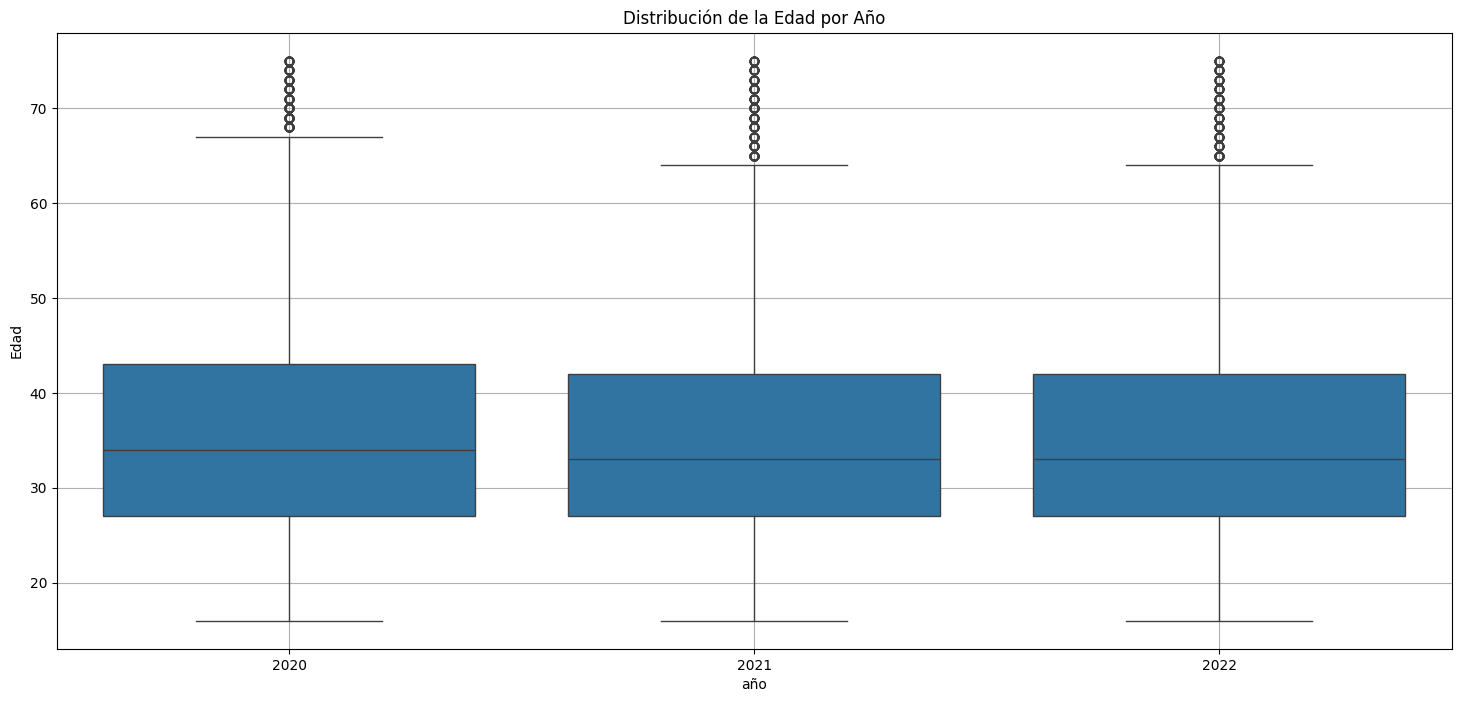

In [220]:
complete_df["año"] = complete_df["fecha"].dt.year

# Crear el boxplot, agrupando por año
plt.figure(figsize=(18, 8))
sns.boxplot(x="año", y="edad_persona_en_situacion_de_violencia", data=complete_df)

# Personalización del gráfico (opcional)
plt.ylabel("Edad")
plt.title("Distribución de la Edad por Año")
plt.grid(True)

plt.show()

## Paso 6: Análisis Temporal

### Evolución de las Llamadas

- Se creará un gráfico de líneas que muestre la cantidad de llamadas recibidas por la Línea 144, desglosadas por año y mes. Este gráfico permitirá visualizar si ha habido un aumento o disminución en el número de llamadas a lo largo del tiempo.
- En marzo de 2020 se dispararon los casos de violencia de género y se mantuvieron por encima de los valores históricos de 2021 y 2022 a lo largo de todo el año. Atribuimos este crecimiento a la situación generada por la pandemia de COVID-19, que obligó a mantener confinados a víctimas y victimarios durante ese período.

### Distribución de Edades

- Se analizará la evolución de las edades de las personas que realizan las denuncias. Para ello, se generará un gráfico de líneas que muestre cómo han cambiado las edades promedio de los denunciantes a lo largo del tiempo.

Con este análisis se puede entender mejor las dinámicas de las denuncias en los distintos rangos etarios.


### **Paso 6.1**: Evolucion de las llamadas a lo largo del tiempo


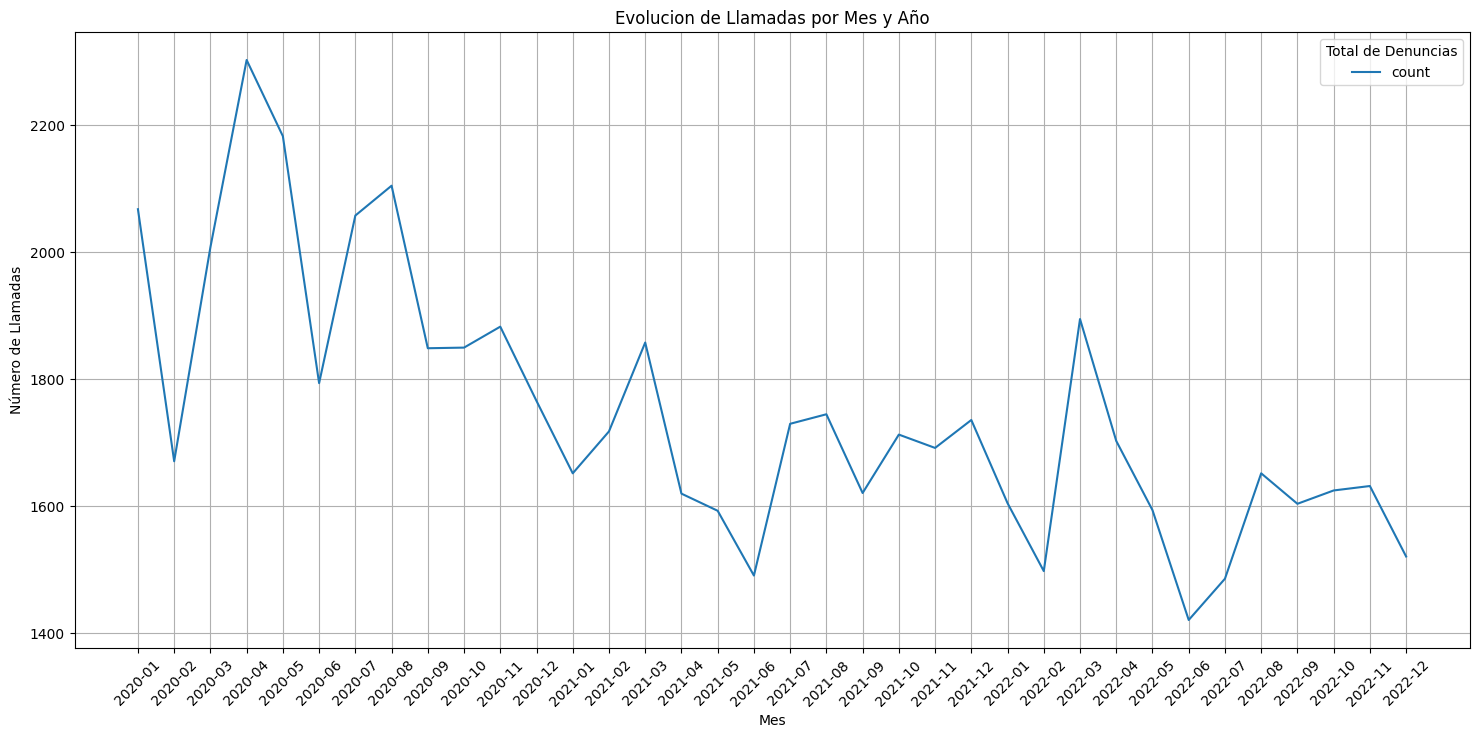

In [221]:
# Group by year and month
calls_per_year_month = (
    complete_df.groupby(complete_df["fecha"].dt.to_period("M"))
    .size()
    .reset_index(name="count")
)

# Plot the data
fig, ax = plt.subplots(figsize=(18, 8))
calls_per_year_month.plot(ax=ax)
ax.set_xlabel("Mes")
ax.set_ylabel("Número de Llamadas")
ax.set_title("Evolucion de Llamadas por Mes y Año")
ax.legend(title="Total de Denuncias")
# Set the x-ticks to be the months
ax.set_xticks(range(len(calls_per_year_month)))
ax.set_xticklabels(calls_per_year_month["fecha"], rotation=45)
plt.grid(visible=True)
plt.show()

### **Paso 6.2**: Evolucion de las edades de los denunciantes.


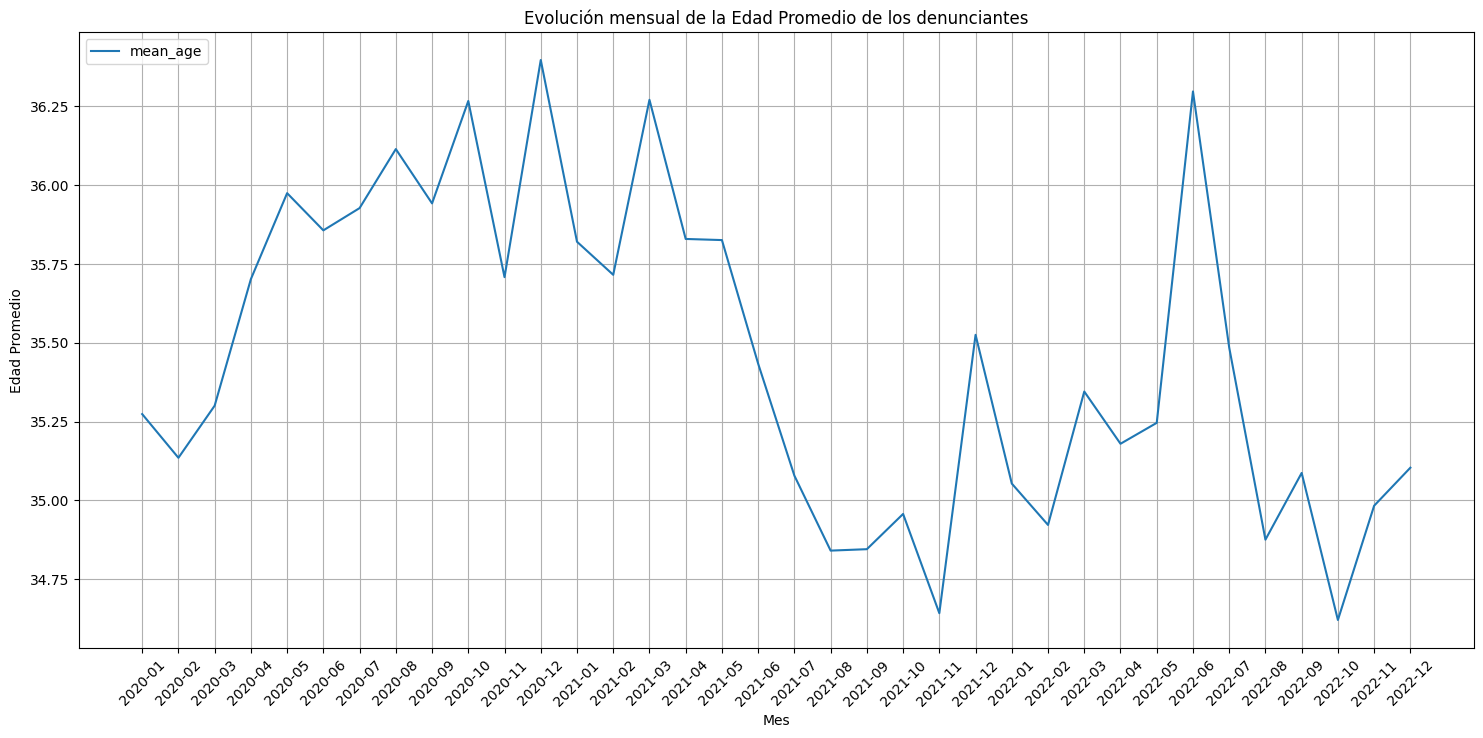

In [222]:
# Analysis of the evolution of the ages
age_per_year_month = (
    complete_df.groupby(complete_df["fecha"].dt.to_period("M"))[
        "edad_persona_en_situacion_de_violencia"
    ]
    .mean()
    .reset_index(name="mean_age")
)

fig, ax = plt.subplots(figsize=(18, 8))
age_per_year_month.plot(ax=ax)
ax.set_xlabel("Mes")
ax.set_ylabel("Edad Promedio")
ax.set_title("Evolución mensual de la Edad Promedio de los denunciantes")
ax.legend(title="Año")
ax.legend(loc="upper left")
ax.set_xticks(range(len(calls_per_year_month)))
ax.set_xticklabels(calls_per_year_month["fecha"], rotation=45)
plt.grid(visible=True)

plt.show()

## **Paso 7**: Preguntas de Investigación

En este paso, se busca explorar y responder preguntas clave relacionadas con las distintas formas de violencia reportadas. A continuación, se presentan algunas observaciones y correlaciones identificadas:

- **Correlación Positiva entre Violencia Doméstica y Violencia Física y Psicológica**:
  Se nota una correlación positiva entre los casos de violencia doméstica acompañados de violencia física y psicológica. Esto sugiere que cuando se reporta violencia doméstica, es común que también se presenten formas de violencia física y psicológica.

- **Correlaciones entre Distintas Formas de Violencia**:
  Se pueden observar distintas correlaciones entre las diversas formas de violencia. Por ejemplo, la violencia psicológica a menudo está relacionada con la violencia física, indicando que estas formas de violencia tienden a coexistir.

- **Relación Negativa con Violencia Sexual**:
  Los casos de violencia sexual están relacionados negativamente con otras formas de violencia. Esto podría indicar que la violencia sexual se reporta de manera independiente o en contextos diferentes a otras formas de violencia.

### Vinculo con la persona agresora

- El gráfico de torta muestra la distribución de la relación con la persona agresora. La observación principal es que el mayor porcentaje de agresores corresponde a la ex pareja y la pareja, indicando que la mayoría de los casos de violencia reportados involucran a personas con las que la víctima ha tenido o tiene una relación sentimental cercana.

### Glosario

De acuerdo a lo que se describe en la Ley 26.485 (Ley de Protección Integral para Prevenir, Sancionar y Erradicar la Violencia contra las Mujeres):

#### Tipo de Violencia

- **Definición General**: Hace referencia a la categoría principal de violencia, estableciendo un marco amplio de clasificación.

#### Modalidad de Violencia

- **Definición Más Específica**: Se refiere a las formas particulares en que se expresa un tipo de violencia, es decir, a las manifestaciones concretas de ese tipo.
- **Ejemplos**: Dentro de la violencia psicológica, una modalidad podría ser el acoso, la humillación, el control, etc.

Con este análisis, se busca entender mejor las dinámicas y relaciones entre las distintas formas y modalidades de violencia.


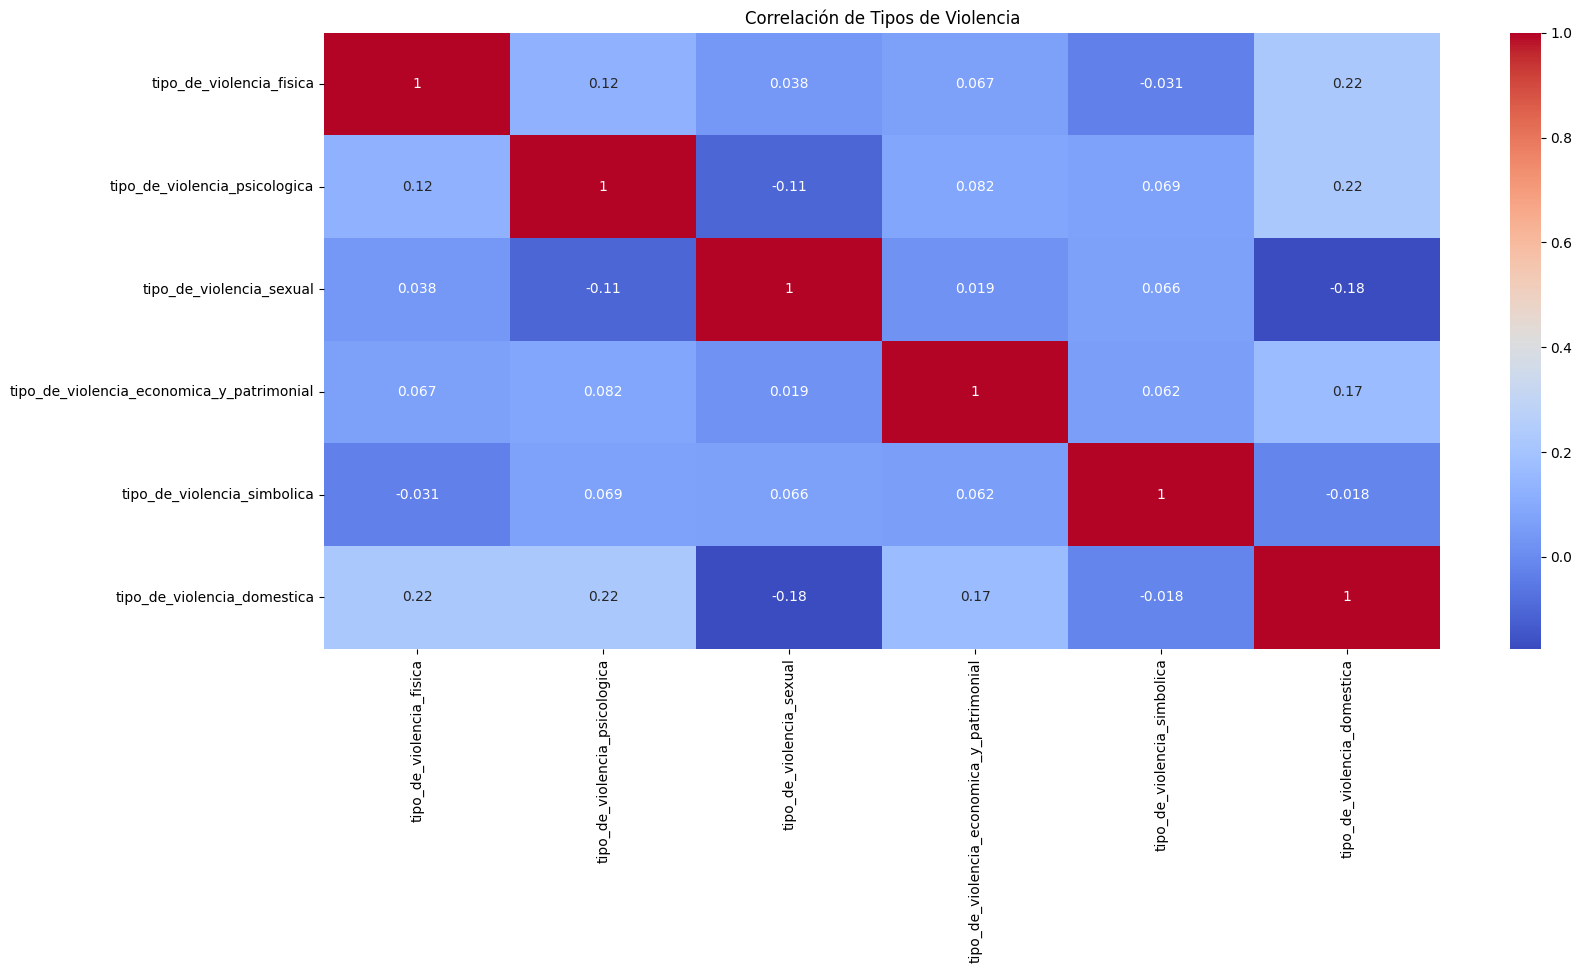

In [223]:
# Extract only the boolean columns
bool_columns = complete_df.select_dtypes(include="bool").filter(regex="^tipo_")


# Convert the boolean columns to integers

df_v = bool_columns.astype(int)


# Calculate the correlation matrix

corr_matrix = df_v.corr()


# Heatmap creation

plt.figure(figsize=(18, 8))

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlación de Tipos de Violencia")

plt.show()

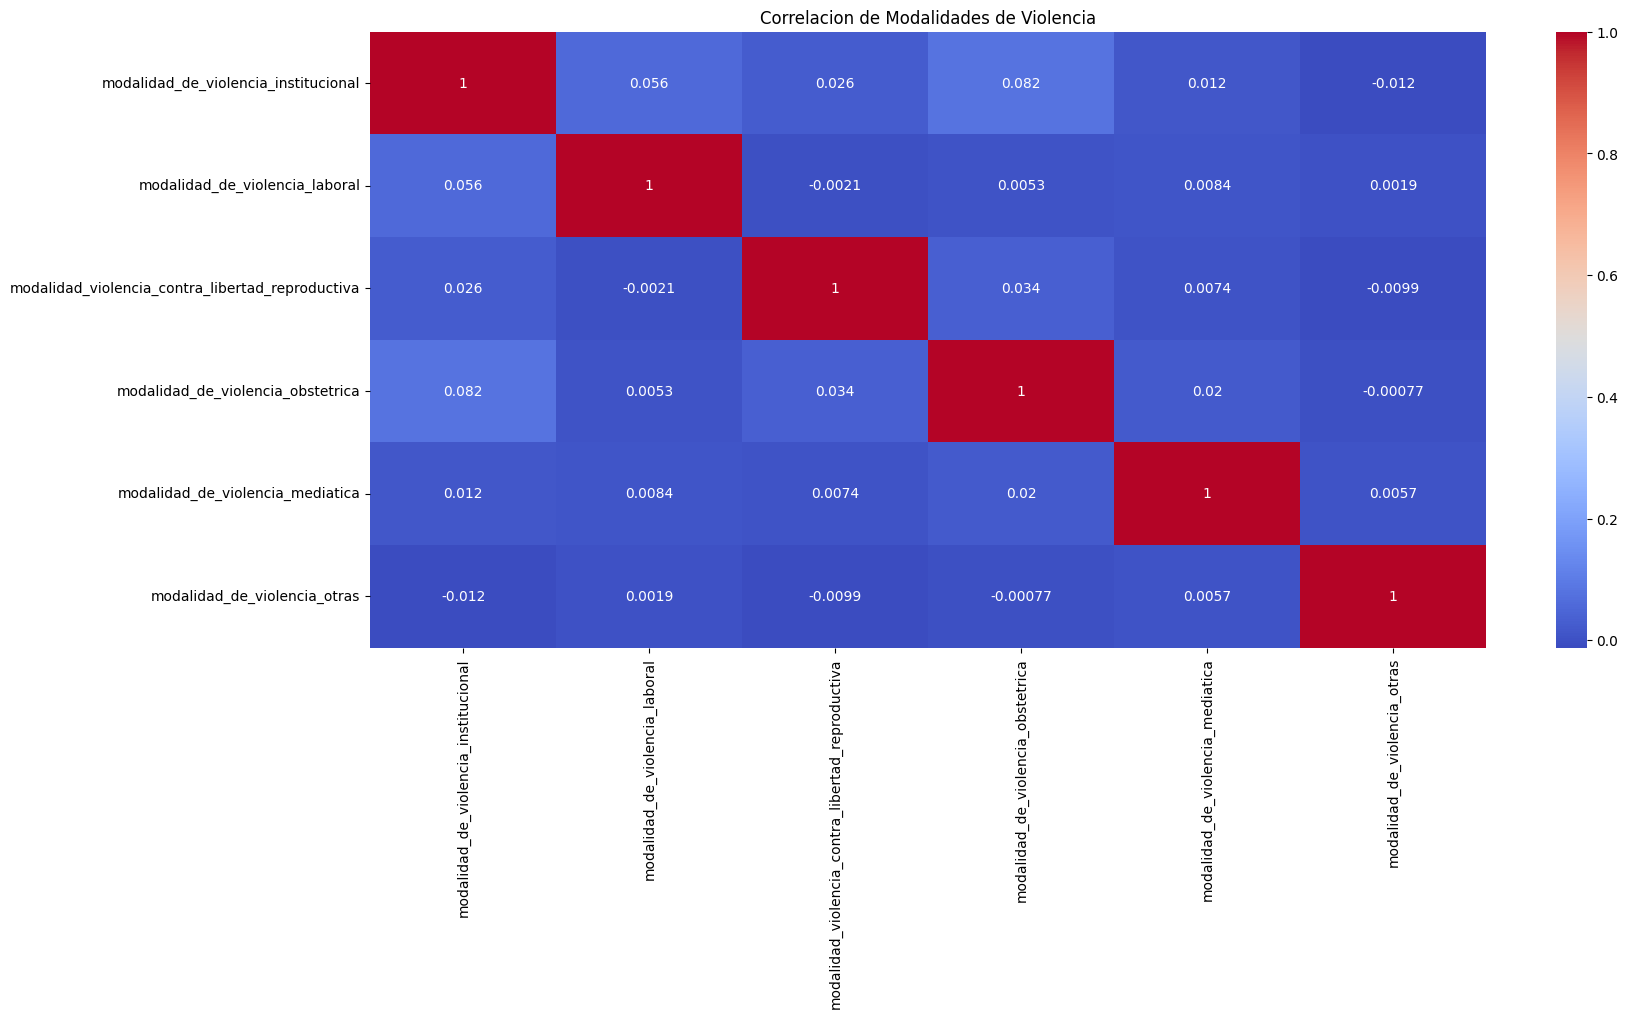

In [224]:
# Extract only the boolean columns
bool_columns = complete_df.select_dtypes(include="bool").filter(regex="^modalidad_")

# Convert the boolean columns to integers
df_v = bool_columns.astype(int)

# Calculate the correlation matrix
corr_matrix = df_v.corr()

# Heatmap creation
plt.figure(figsize=(18, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlacion de Modalidades de Violencia")
plt.show()

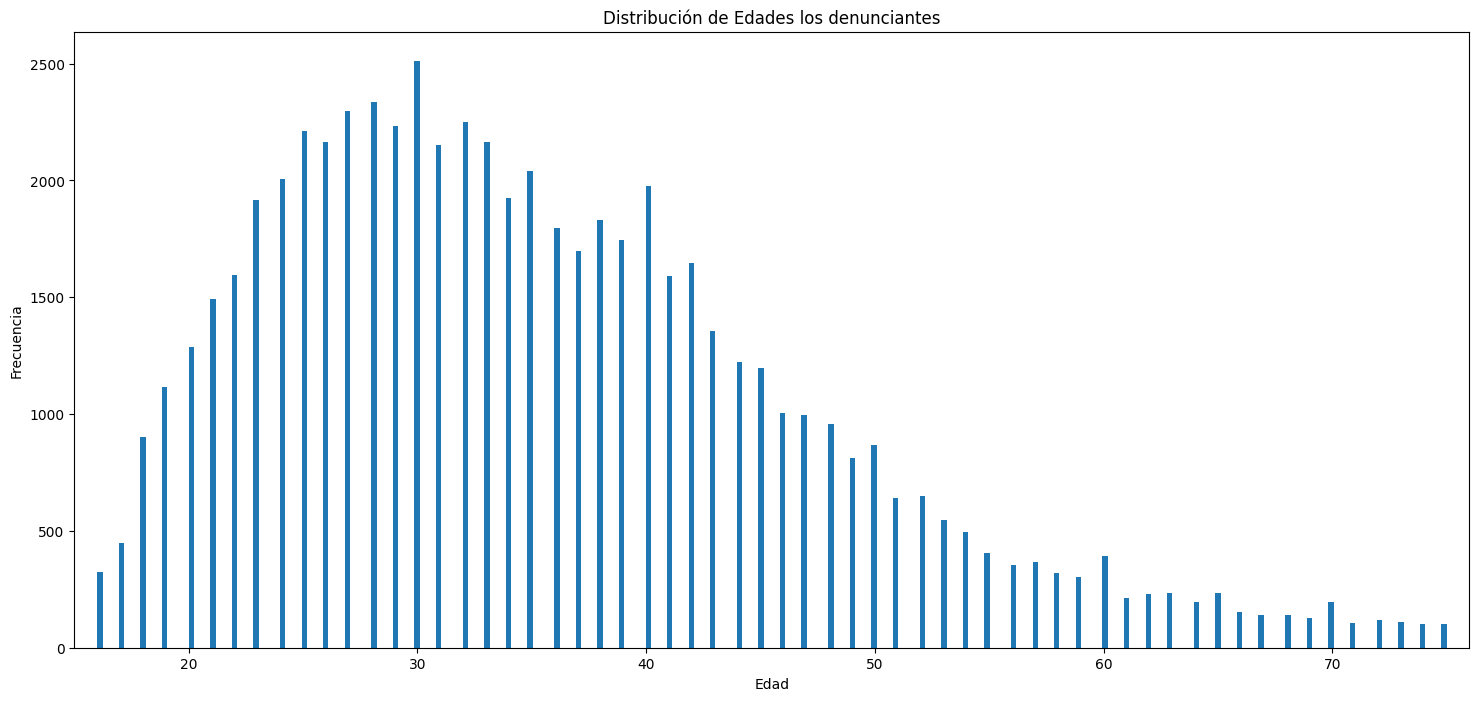

In [225]:
# Plot histogram for age distribution
age_series = complete_df["edad_persona_en_situacion_de_violencia"]
total_records = complete_df["edad_persona_en_situacion_de_violencia"].count()
square_root_rule = int(np.ceil(np.sqrt(total_records)))

fig, ax = plt.subplots(figsize=(18, 8))
n, bins, patches = ax.hist(age_series, bins=square_root_rule)

ax.set_xlim(age_series.min() - 1, age_series.max() + 1)
ax.set_xlabel("Edad")
ax.set_ylabel("Frecuencia")
ax.set_title("Distribución de Edades los denunciantes")

plt.show()

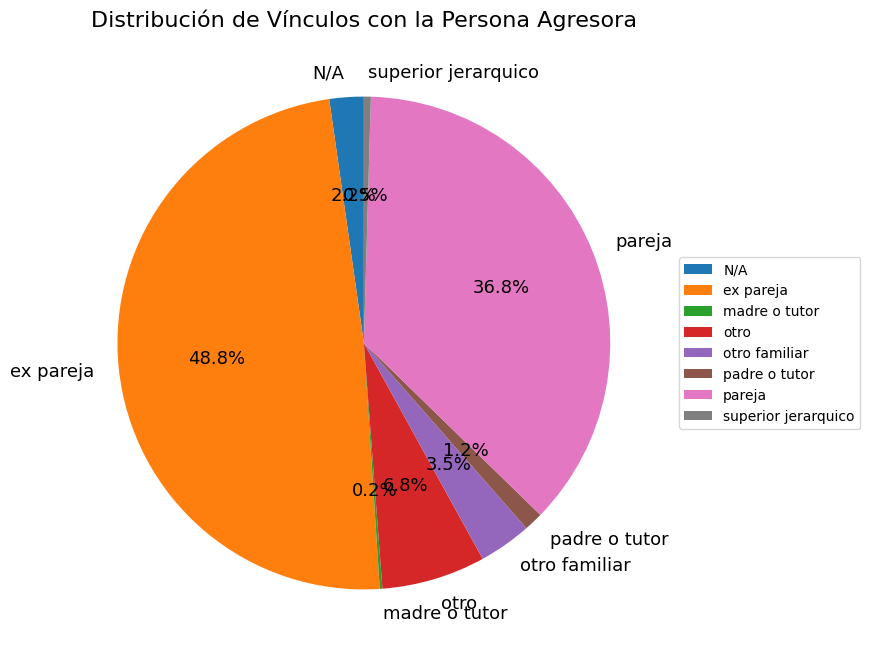

  vinculo_con_la_persona_agresora  count
0                             N/A   1414
1                       ex pareja  30706
2                   madre o tutor    108
3                            otro   4286
4                   otro familiar   2175
5                   padre o tutor    783
6                          pareja  23184
7             superior jerarquico    287


In [226]:
vinculo_df = (
    complete_df.groupby("vinculo_con_la_persona_agresora")
    .size()
    .reset_index(name="count")
)

fig, ax = plt.subplots(figsize=(18, 8))

ax.pie(
    vinculo_df["count"],
    labels=vinculo_df["vinculo_con_la_persona_agresora"],
    autopct="%1.1f%%",
    startangle=90,
    textprops={"fontsize": 13},
)
# ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Distribución de Vínculos con la Persona Agresora", fontsize=16)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

print(vinculo_df)